In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 분류를 위한 라이브러리
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# train / test 분리 라이브러리
from sklearn.model_selection import train_test_split

# 성능평가 라이브러리
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, accuracy_score

# 데이터 불러오기
from sklearn.datasets import load_iris

from matplotlib import font_manager, rc, cm
import matplotlib as mpl

# 마이너스 깨짐 현상 해결
mpl.rcParams['axes.unicode_minus'] = False
# 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

# 3D 그래프를 위한 모듈
from mpl_toolkits.mplot3d import Axes3D

# 로지스틱 회귀

* 간단한 예제

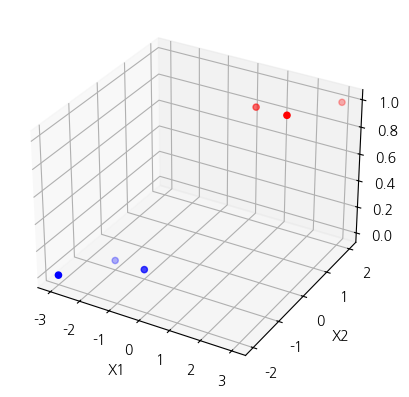

In [2]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter([-1, -2, -3], [-1, -1, -2], [0, 0, 0], color='blue')
ax.scatter([1, 2, 3], [1, 1, 2], [1, 1, 1], color='red')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [3]:
# train data
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([0, 0, 0, 1, 1, 1])

# test_data 정의
X_test = [[-2, 2]]

# 모두 양수일 확률
# X_test = [[2, 2]]

In [4]:
# 모델 생성
model = LogisticRegression()

# 학습
model.fit(X, y)

# 예측 확률
print(model.predict_proba(X_test))

# 예측 결과
model.predict(X_test)

[[0.60798904 0.39201096]]


array([0])

# 선형 판별 분석

* 간단한 예제

In [5]:
model = LinearDiscriminantAnalysis()

model.fit(X, y)

print(model.predict_proba(X_test))

model.predict(X_test)

[[1.12535162e-07 9.99999887e-01]]


array([1])

# 실데이터 분석하기
* Heart 데이터

In [7]:
path = '../datasets/ML_data/'

raw = pd.read_csv(path+'Heart.csv', index_col=0)
heart = raw.copy()
print(heart.shape)
heart.head(2)

(303, 14)


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes


In [9]:
# feature, label
X = heart[['Age', 'Sex', 'Chol']]
y = heart['AHD']

# train, test data 분리하기
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 모델 생성하기
lda = LinearDiscriminantAnalysis()

# 학습하기
lda.fit(X_train, y_train)

# 예측하기
y_test_pred = lda.predict(X_test)

In [10]:
y_test_pred

array(['Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'Yes'], dtype='<U3')

In [11]:
# confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[23, 10],
       [11, 17]], dtype=int64)

In [15]:
# 분류 결과 평가
# precision = tp / (tp+fp)
print('정밀도 :', precision_score(y_test, y_test_pred, average='macro'))
# recall = tp / (tp+fn)
print('재현율 :', recall_score(y_test, y_test_pred, average='macro'))
# accuracy = (tp+tn) / all
print('정확도 :', accuracy_score(y_test, y_test_pred))

정밀도 : 0.6530501089324618
재현율 : 0.652056277056277
정확도 : 0.6557377049180327


* Iris data

## 데이터 준비

In [17]:
# 이미 제공하는 데이터를 X, y 형태로 나눠진 상태로 가져오기
X, y = load_iris(return_X_y=True)

In [19]:
# 모델 생성
model = LogisticRegression(random_state=42)

# 모델 훈련
model.fit(X, y)

# 예측하기
model.predict(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
# label 예측 --> 비율
model.predict_proba(X)

array([[9.81799203e-01, 1.82007824e-02, 1.44272072e-08],
       [9.71729178e-01, 2.82707921e-02, 3.01668533e-08],
       [9.85446345e-01, 1.45536425e-02, 1.23270318e-08],
       [9.76285990e-01, 2.37139700e-02, 3.97262152e-08],
       [9.85382932e-01, 1.46170562e-02, 1.19455104e-08],
       [9.70459635e-01, 2.95402915e-02, 7.35327888e-08],
       [9.86881109e-01, 1.31188708e-02, 1.99819334e-08],
       [9.76397711e-01, 2.36022610e-02, 2.76325870e-08],
       [9.79834341e-01, 2.01656287e-02, 3.06905725e-08],
       [9.69133564e-01, 3.08664045e-02, 3.16507811e-08],
       [9.76508915e-01, 2.34910654e-02, 1.92205435e-08],
       [9.75398771e-01, 2.46011854e-02, 4.38583491e-08],
       [9.74560246e-01, 2.54397326e-02, 2.14865104e-08],
       [9.91969176e-01, 8.03081976e-03, 3.89517416e-09],
       [9.88210680e-01, 1.17893169e-02, 2.80747213e-09],
       [9.86772962e-01, 1.32270251e-02, 1.27908347e-08],
       [9.88116896e-01, 1.18830948e-02, 9.19928949e-09],
       [9.81554930e-01, 1.84450

In [21]:
# 정확도 확인
model.score(X, y)

0.9733333333333334